## # Introduction
<p><img src="https://assets.datacamp.com/production/project_981/img/lego_unsplash.jpg" alt="A picture of Lego characters!"></p>
<h3 id="letslookatlegosets">Let's look at Lego sets!</h3>
<p>Lego is a household name across the world, supported by a diverse toy line, hit movies, and a series of successful video games. In this project, we are going to explore a key development in the history of Lego: the introduction of licensed sets such as Star Wars, Super Heroes, and Harry Potter.</p>
<p>It may not be widely known, but Lego has had its share of ups and downs since its inception in the early 20th century. This includes a particularly rough period in the late 90s. As described in <a href="https://www.businessinsider.com/how-lego-made-a-huge-turnaround-2014-2?r=US&IR=T">this article</a>, Lego was only able to survive due to a successful internal brand (Bionicle) and the introduction of its first licensed series: Star Wars. In the instructions panel are the two questions you will need to answer to complete this project.</p>
<p>Before diving into our analysis though, let's become familiar with the two datasets that will help you with this project:<br><br></p>
<div style="background-color: #ebf4f7; color: #595959; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/lego_sets.csv</b></div>
<ul>
    <li><b>set_num:</b> A code that is unique to each set in the dataset. <b><i>This column is critical, and a missing value indicates the set is a duplicate or invalid!</i></b></li>
    <li><b>set_name:</b> A name for every set in the dataset (note that this can be the same for different sets).</li>
    <li><b>year:</b> The date the set was released.</li>
    <li><b>num_parts:</b> The number of parts contained in the set.<b><i> This column is not central to our analyses, so missing values are acceptable.</i></b></li>
        <li><b>theme_name:</b> The name of the sub-theme of the set.</li>
    <li><b>parent_theme:</b> The name of the parent theme the set belongs to. Matches the `name` column of the `parent_themes` csv file.</li>
</ul>

<div style="font-size:20px"><b>datasets/parent_themes.csv</b></div>
<ul>
    <li><b>id:</b> A code that is unique to every theme.</li>
    <li><b>name:</b> The name of the parent theme.</li>
    <li><b>is_licensed:</b> A Boolean column specifying whether the theme is a licensed theme.</li>
</ul>
    </div>
<p>From here on out, it will be your task to explore and manipulate the existing data until you are able to answer the two questions described in the instructions panel. Feel free to add as many cells as necessary. Finally, remember that you are only tested on your answer, not on the methods you use to arrive at the answer!</p>
<p><em><strong>Note:</strong> If you haven't completed a DataCamp project before you should check out the <a href="https://projects.datacamp.com/projects/33">Intro to Projects</a> first to learn about the interface. In this project, you also need to know your way around <code>pandas</code> DataFrames and it's recommended that you take a look at the course <a href="https://www.datacamp.com/courses/data-manipulation-with-pandas">Data Manipulation with pandas</a>.</em></p>

# ANALYSIS

#### Loading Datasets

In [135]:
# Use this cell to begin your analyses, and add as many cells as you would like!

#Import pandas as pd
import pandas as pd

#Loading file into pandas DataFrames
sets=pd.read_csv("datasets/lego_sets.csv")

#Taking a look at first few rows
print(sets.head())
print(sets.shape)

  set_num                        name  year  num_parts    theme_name  \
0    00-1             Weetabix Castle  1970      471.0        Castle   
1  0011-2           Town Mini-Figures  1978        NaN  Supplemental   
2  0011-3  Castle 2 for 1 Bonus Offer  1987        NaN  Lion Knights   
3  0012-1          Space Mini-Figures  1979       12.0  Supplemental   
4  0013-1          Space Mini-Figures  1979       12.0  Supplemental   

  parent_theme  
0     Legoland  
1         Town  
2       Castle  
3        Space  
4        Space  
(11986, 6)


In [136]:
# Taking a look at out first dataset - sets

print(sets.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11986 entries, 0 to 11985
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   set_num       11833 non-null  object 
 1   name          11833 non-null  object 
 2   year          11986 non-null  int64  
 3   num_parts     6926 non-null   float64
 4   theme_name    11833 non-null  object 
 5   parent_theme  11986 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 562.0+ KB
None


We can observe that our dataset has total 6 columsn and 11986 rows

It contains 4 columns with string datatype, 1 with int and 1 with floating point numbers.

The dataset also has many null values. From the set_num column, it can be seen that 11833 values are non-null.

In [137]:
# Getting idea about null values

print(sets.isna().any())

set_num          True
name             True
year            False
num_parts        True
theme_name       True
parent_theme    False
dtype: bool


We can see that 4 columns contains missing values.

In [138]:
# Number of missing values in each column
print(sets.isna().sum())

set_num          153
name             153
year               0
num_parts       5060
theme_name       153
parent_theme       0
dtype: int64


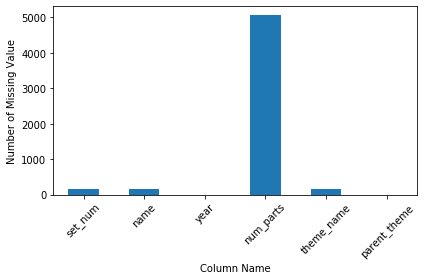

In [139]:
#Plotting the results
import matplotlib.pyplot as plt

sets.isna().sum().plot(kind="bar", rot=45)
plt.xlabel("Column Name")
plt.ylabel("Number of Missing Value")
plt.show()


Focusing on set_num column

In [140]:
print(sets["set_num"].isna().value_counts())

False    11833
True       153
Name: set_num, dtype: int64


In [141]:
# Printing only those rows with missing values 
# We can observe that these are 153 in number 

print(sets[sets["set_num"].isna()])

      set_num name  year  num_parts theme_name     parent_theme
11833     NaN  NaN  2017      347.0        NaN  Disney Princess
11834     NaN  NaN  2016       70.0        NaN  Disney Princess
11835     NaN  NaN  2016        NaN        NaN  Disney Princess
11836     NaN  NaN  2017      304.0        NaN     Super Heroes
11837     NaN  NaN  2017      196.0        NaN     Super Heroes
...       ...  ...   ...        ...        ...              ...
11981     NaN  NaN  2014        NaN        NaN        Minecraft
11982     NaN  NaN  2006        NaN        NaN     Super Heroes
11983     NaN  NaN  2017        NaN        NaN        Minecraft
11984     NaN  NaN  2017        8.0        NaN     Super Heroes
11985     NaN  NaN  2003        NaN        NaN     Harry Potter

[153 rows x 6 columns]


In [142]:
# Dropping rows with missing values in set_num column 
# a missing value in set_num column indicates the set is a duplicate or invalid
sets_cleaned=sets.dropna(subset=["set_num"])
print(sets_cleaned.head())

  set_num                        name  year  num_parts    theme_name  \
0    00-1             Weetabix Castle  1970      471.0        Castle   
1  0011-2           Town Mini-Figures  1978        NaN  Supplemental   
2  0011-3  Castle 2 for 1 Bonus Offer  1987        NaN  Lion Knights   
3  0012-1          Space Mini-Figures  1979       12.0  Supplemental   
4  0013-1          Space Mini-Figures  1979       12.0  Supplemental   

  parent_theme  
0     Legoland  
1         Town  
2       Castle  
3        Space  
4        Space  


In [143]:
print(sets_cleaned['set_num'].isna().value_counts())

False    11833
Name: set_num, dtype: int64


In [144]:
print(sets_cleaned.isna().any())

set_num         False
name            False
year            False
num_parts        True
theme_name      False
parent_theme    False
dtype: bool


In [145]:
#Checking again for missing values
print(sets_cleaned.isna().sum())

set_num            0
name               0
year               0
num_parts       4998
theme_name         0
parent_theme       0
dtype: int64


##### Loading second dataframe

In [146]:
#Loading file into pandas DataFrames

parent_themes=pd.read_csv("datasets/parent_themes.csv")

print(parent_themes.head())
print(parent_themes.shape)

    id     name  is_licensed
0    1  Technic        False
1   22  Creator        False
2   50     Town        False
3  112   Racers        False
4  126    Space        False
(111, 3)


In [147]:
print(parent_themes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           111 non-null    int64 
 1   name         111 non-null    object
 2   is_licensed  111 non-null    bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 2.0+ KB
None


In [148]:
# unique themes in this dataset
parent_themes["name"].nunique()

111

##### Inspecting second dataframe for missing values

In [149]:
print(parent_themes.isna().any())

id             False
name           False
is_licensed    False
dtype: bool


This dataset doesnt contain any null values

### 1. What percentage of all licensed sets ever released were Star Wars themed? 

Save your answer as a variable the_force in the form of an integer (e.g. 25).

In [150]:
#Merging the two tables sets with the parent_themes table.
# We can observe that the two tables have matching columns - 
#parent_theme and name in the parent_themes table.

all_sets=sets.merge(parent_themes, left_on='parent_theme', right_on='name', suffixes=('_sets','_parent'), how='left')
print(all_sets.head())

print(all_sets.shape)

# We can observe that the two tables have one-to-one relationship
# Number of rows returned = 11986, same as in the left table.

  set_num                   name_sets  year  num_parts    theme_name  \
0    00-1             Weetabix Castle  1970      471.0        Castle   
1  0011-2           Town Mini-Figures  1978        NaN  Supplemental   
2  0011-3  Castle 2 for 1 Bonus Offer  1987        NaN  Lion Knights   
3  0012-1          Space Mini-Figures  1979       12.0  Supplemental   
4  0013-1          Space Mini-Figures  1979       12.0  Supplemental   

  parent_theme   id name_parent  is_licensed  
0     Legoland  411    Legoland        False  
1         Town   50        Town        False  
2       Castle  186      Castle        False  
3        Space  126       Space        False  
4        Space  126       Space        False  
(11986, 9)


In [151]:
# Getting idea about the number of licensed and unlicensed lego sets
print(all_sets['is_licensed'].value_counts())

False    10654
True      1332
Name: is_licensed, dtype: int64


In [152]:
#filtering only licensed sets
licensed_sets=all_sets[all_sets['is_licensed']==True]
print(licensed_sets.head())

print(licensed_sets.shape)

    set_num                      name_sets  year  num_parts  \
44  10018-1                     Darth Maul  2001     1868.0   
45  10019-1    Rebel Blockade Runner - UCS  2001        NaN   
54  10026-1        Naboo Starfighter - UCS  2002        NaN   
57  10030-1  Imperial Star Destroyer - UCS  2002     3115.0   
95  10075-1         Spider-Man Action Pack  2002       25.0   

                 theme_name  parent_theme   id   name_parent  is_licensed  
44                Star Wars     Star Wars  158     Star Wars         True  
45  Star Wars Episode 4/5/6     Star Wars  158     Star Wars         True  
54      Star Wars Episode 1     Star Wars  158     Star Wars         True  
57  Star Wars Episode 4/5/6     Star Wars  158     Star Wars         True  
95               Spider-Man  Super Heroes  482  Super Heroes         True  
(1332, 9)


In [153]:
# Getting idea about the kind of parent_themes in our dataset of licensed sets

print(licensed_sets['parent_theme'].value_counts())

Star Wars                           609
Super Heroes                        343
Harry Potter                         93
Minecraft                            44
Disney Princess                      41
The Hobbit and Lord of the Rings     40
Cars                                 27
Teenage Mutant Ninja Turtles         21
Indiana Jones                        19
Pirates of the Caribbean             17
Toy Story                            15
SpongeBob SquarePants                14
The Lone Ranger                       8
Jurassic World                        7
Angry Birds                           6
Disney's Mickey Mouse                 6
Ben 10                                6
Scooby-Doo                            6
Prince of Persia                      6
Avatar                                2
Ghostbusters                          1
Disney                                1
Name: parent_theme, dtype: int64


In [154]:
# Calculating number of licensed sets with Star Wars theme
star_wars_licensed=licensed_sets[licensed_sets["parent_theme"]=='Star Wars']
print(star_wars_licensed.head())
print(star_wars_licensed.shape)


     set_num                      name_sets  year  num_parts  \
44   10018-1                     Darth Maul  2001     1868.0   
45   10019-1    Rebel Blockade Runner - UCS  2001        NaN   
54   10026-1        Naboo Starfighter - UCS  2002        NaN   
57   10030-1  Imperial Star Destroyer - UCS  2002     3115.0   
116  10123-1                     Cloud City  2003      707.0   

                  theme_name parent_theme   id name_parent  is_licensed  
44                 Star Wars    Star Wars  158   Star Wars         True  
45   Star Wars Episode 4/5/6    Star Wars  158   Star Wars         True  
54       Star Wars Episode 1    Star Wars  158   Star Wars         True  
57   Star Wars Episode 4/5/6    Star Wars  158   Star Wars         True  
116  Star Wars Episode 4/5/6    Star Wars  158   Star Wars         True  
(609, 9)


In [155]:
no_licensed_star_wars=star_wars_licensed['set_num'].count()
print(no_licensed_star_wars)

609


In [156]:
no_of_licensed_sets=licensed_sets['set_num'].count()
print(no_of_licensed_sets)

1179


In [157]:
the_force=(no_licensed_star_wars/no_of_licensed_sets) * 100
print(int(the_force))

51


##### 51 % percentage of all licensed sets ever released were Star Wars themed!

### 2. In which year was Star Wars not the most popular licensed theme (in terms of number of sets released that year)?

Save your answer as a variable new_era in the form of an integer (e.g. 2012).

In [158]:
print(licensed_sets.groupby(['year', 'parent_theme'])['parent_theme'].value_counts().sort_values())

year  parent_theme                      parent_theme                    
2015  The Hobbit and Lord of the Rings  The Hobbit and Lord of the Rings      1
2005  Disney's Mickey Mouse             Disney's Mickey Mouse                 1
2017  Pirates of the Caribbean          Pirates of the Caribbean              1
2016  Disney                            Disney                                1
      Scooby-Doo                        Scooby-Doo                            1
                                                                           ... 
      Super Heroes                      Super Heroes                         50
2017  Star Wars                         Star Wars                            55
2015  Star Wars                         Star Wars                            58
2016  Star Wars                         Star Wars                            61
2017  Super Heroes                      Super Heroes                        103
Name: parent_theme, Length: 83, dtype: int64


In [159]:
#Number of licensed themes released each year
print(licensed_sets.groupby('year')['parent_theme'].value_counts())

year  parent_theme            
1999  Star Wars                    13
2000  Star Wars                    26
      Disney's Mickey Mouse         5
2001  Harry Potter                 14
      Star Wars                    14
                                 ... 
2017  Super Heroes                103
      Star Wars                    55
      Minecraft                    13
      Disney Princess               7
      Pirates of the Caribbean      1
Name: parent_theme, Length: 83, dtype: int64


In [160]:
themes_each_year=licensed_sets.groupby('year')['parent_theme'].value_counts()
print(themes_each_year.sort_values(['year','parent_theme']))

TypeError: unhashable type: 'list'

In [ ]:
print(licensed_sets.pivot_table(index='year', columns='parent_theme', aggfunc='count'))

In [161]:
licensed_pivot=licensed_sets.pivot_table(index='year', columns='parent_theme', values='set_num', aggfunc='count')

print(licensed_pivot.head())

parent_theme  Angry Birds  Avatar  Ben 10  Cars  Disney  Disney Princess  \
year                                                                       
1999                  NaN     NaN     NaN   NaN     NaN              NaN   
2000                  NaN     NaN     NaN   NaN     NaN              NaN   
2001                  NaN     NaN     NaN   NaN     NaN              NaN   
2002                  NaN     NaN     NaN   NaN     NaN              NaN   
2003                  NaN     NaN     NaN   NaN     NaN              NaN   

parent_theme  Disney's Mickey Mouse  Ghostbusters  Harry Potter  \
year                                                              
1999                            NaN           NaN           NaN   
2000                            5.0           NaN           NaN   
2001                            NaN           NaN          11.0   
2002                            NaN           NaN          19.0   
2003                            NaN           NaN           3.0  

In [162]:
licensed_pivot_filled=licensed_pivot.fillna(0)

print(licensed_pivot_filled)

parent_theme  Angry Birds  Avatar  Ben 10  Cars  Disney  Disney Princess  \
year                                                                       
1999                  0.0     0.0     0.0   0.0     0.0              0.0   
2000                  0.0     0.0     0.0   0.0     0.0              0.0   
2001                  0.0     0.0     0.0   0.0     0.0              0.0   
2002                  0.0     0.0     0.0   0.0     0.0              0.0   
2003                  0.0     0.0     0.0   0.0     0.0              0.0   
2004                  0.0     0.0     0.0   0.0     0.0              0.0   
2005                  0.0     0.0     0.0   0.0     0.0              0.0   
2006                  0.0     2.0     0.0   0.0     0.0              0.0   
2007                  0.0     0.0     0.0   0.0     0.0              0.0   
2008                  0.0     0.0     0.0   0.0     0.0              0.0   
2009                  0.0     0.0     0.0   0.0     0.0              0.0   
2010        

#### Filtering a pivot table

In [ ]:
max_sets_each_year= licensed_pivot_filled.max(axis='columns')
print(max_sets_each_year)

In [ ]:
##  star wars themed set
print(licensed_pivot_filled['Star Wars'])

In [ ]:
## Comparing max sets with star wars themed set
compare_star_wars_max=licensed_pivot_filled['Star Wars']<max_sets_each_year
print(compare_star_wars_max)

In [ ]:
print(compare_star_wars_max.index)

In [ ]:
print(compare_star_wars_max[compare_star_wars_max != False])

In [ ]:
print(int(compare_star_wars_max[compare_star_wars_max != False].index[0]))

In [ ]:
new_era=int(compare_star_wars_max[compare_star_wars_max != False].index[0])

print(new_era)